In [1]:
import sys
import os

SCRIPT_DIR = "c:/Users/Luke Yang/Documents/100_Luke/100_School/130_University_of_Toronto/2023_2024/APS360/Anime-popularity-predictor/transformer_synopsis"
sys.path.append(os.path.dirname(SCRIPT_DIR))

os.chdir('C:\\Users\\Luke Yang\\Documents\\100_Luke\\100_School\\130_University_of_Toronto\\2023_2024\\APS360\\Anime-popularity-predictor')

import torch
import torch.nn as nn
import pandas as pd
import common
from common import model
from common import evaluate
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

import transformer_synopsis_model
from transformer_synopsis_model import *
from common import separate_test

c:\Users\Luke Yang\Documents\100_Luke\100_School\130_University_of_Toronto\2023_2024\APS360\Anime-popularity-predictor\transformer_synopsis


In [2]:
separate_test.separate_csv()

In [14]:
evaluate.get_best_loss("training")

[0.2280670869744049, 46, 'training\\transformer_adamW_save_dataloaders_unbalanced_16_1_0.001_100_328_256_1_99_val_loss.csv']


[0.2280670869744049,
 46,
 'training\\transformer_adamW_save_dataloaders_unbalanced_16_1_0.001_100_328_256_1_99_val_loss.csv']

['5.039513726507609093e+00', '1.501776247585484780e+00', '8.157770227379173011e-01', '1.088539711404492794e+00', '6.971880111888979492e-01', '7.904594010006034122e-01', '5.521291207253862243e-01', '3.866192015364036116e-01', '3.525515131502816035e-01', '3.054293173485146395e-01', '3.030910838127066076e-01', '2.700543195567804977e-01', '2.705645232533963607e-01', '2.589248458699817124e-01', '2.563920393289279009e-01', '2.527876416179478114e-01', '2.442207628643357775e-01', '2.429376239385323821e-01', '2.404686528122780553e-01', '2.382330764601844897e-01', '2.429939734528485662e-01', '2.571085485681416372e-01', '2.350008496365904587e-01', '2.308793550757460289e-01', '2.381920824102274625e-01', '2.376598808991391698e-01', '2.398297812024388631e-01', '2.369632493680367269e-01', '2.325546760562864634e-01', '2.301084088830116781e-01', '2.331614708077105191e-01', '2.321739404285249608e-01', '2.281296678962803914e-01', '2.263471100566229188e-01', '2.277006529884054442e-01', '2.2583282859765055

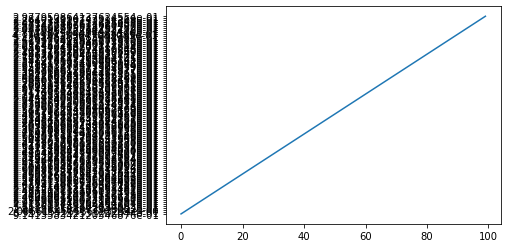

In [5]:
import csv
from itertools import chain

cwd = os.getcwd()
file = f'{cwd}/training/transformer_adamW_save_dataloaders_unbalanced_16_1_0.001_100_328_256_1_99_train_loss.csv'
with open(file, newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

train_loss = list(chain.from_iterable(data))
print(train_loss)

file = f'{cwd}/training/transformer_adamW_save_dataloaders_unbalanced_16_1_0.001_100_328_256_1_99_val_loss.csv'
with open(file, newline='') as f:
    reader = csv.reader(f)
    data = list(reader)


val_loss = list(chain.from_iterable(data))
xs = [x for x in range(len(val_loss))]

import matplotlib.pyplot as plt
# plt.plot(range(1, len(train_loss) + 1), train_loss, label="train")
plt.plot(xs, val_loss)
plt.show()

In [4]:
batch_size=1
count=16

cwd = os.getcwd()
# load unseen data
test, max_len = get_test_loaders(f'{cwd}/data_collection/data/new_test_animes_data.csv', batch_size)

# load training and validation set used to train the model
train = torch.load(f'{cwd}/training/transformer_adam_save_dataloaders_balanced_{count}_train')
val = torch.load(f'{cwd}/training/transformer_adam_save_dataloaders_balanced_{count}_val')

input_size=max_len
lr=0.01
num_epochs=1000
hidden_size=256
num_class=1

# load the saved model with the lowest validation loss
ex = SynopsisTransformer(f"transformer_lowest_val_loss", batch_size, lr, num_epochs, input_size, hidden_size, num_class)
ex.load_state_dict(torch.load(f"{cwd}/training/transformer_adamW_save_dataloaders_unbalanced_16_1_0.001_100_328_256_1_46"))

# output train, validation, and test rmse
train_loss = model.evaluate(ex.cuda(), train)
print(f"training rmse: {train_loss}")

val_loss = model.evaluate(ex.cuda(), val)
print(f"validation rmse: {val_loss}")

test_loss = model.evaluate(ex.cuda(), test)
print(f"test rmse: {test_loss}")

c:\Users\Luke Yang\Documents\100_Luke\100_School\130_University_of_Toronto\2023_2024\APS360\Anime-popularity-predictor\transformer_synopsis\transformer_synopsis_model.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['popularity'] = (df['popularity'] - df['popularity'].min()) / (df['popularity'].max() - df['popularity'].min())
c:\Users\Luke Yang\Documents\100_Luke\100_School\130_University_of_Toronto\2023_2024\APS360\Anime-popularity-predictor\transformer_synopsis\transformer_synopsis_model.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['synopsis

training rmse: 0.2197103199159777
validation rmse: 0.22854615124118216
test rmse: 0.2589242705454429


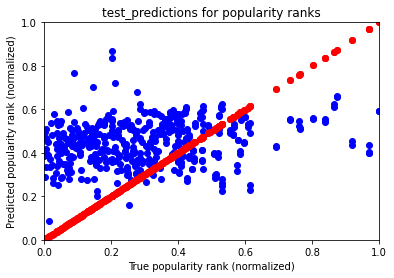

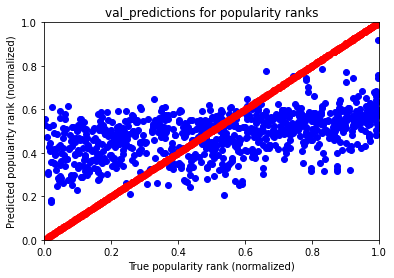

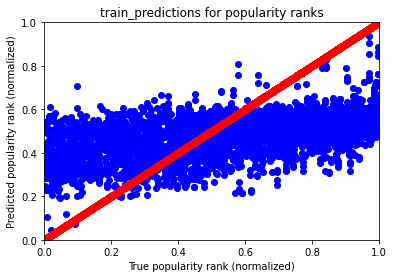

In [4]:
preds = []
labels_list = []
for i, data in enumerate(test, 0):
    inputs, labels = data
    # print(inputs)
    # print(labels)
    pred = ex(inputs)
    preds.append(pred.item())
    labels_list.append(labels.item())   

import matplotlib.pyplot as plt
plt.plot(labels_list, preds, 'bo')
plt.plot(labels_list, labels_list, 'ro')
plt.xlim(0.00, 1.00)
plt.ylim(-0.00, 1.00)
plt.title("test_predictions for popularity ranks")
plt.xlabel("True popularity rank (normalized)")
plt.ylabel("Predicted popularity rank (normalized)")
plt.show()

preds = []
labels_list = []
for i, data in enumerate(val, 0):
    inputs, labels = data
    # print(inputs)
    # print(labels)
    pred = ex(inputs)
    preds.append(pred.item())
    labels_list.append(labels.item())   

plt.plot(labels_list, preds, 'bo')
plt.plot(labels_list, labels_list, 'ro')
plt.xlim(0.00, 1.00)
plt.ylim(-0.00, 1.00)
plt.title("val_predictions for popularity ranks")
plt.xlabel("True popularity rank (normalized)")
plt.ylabel("Predicted popularity rank (normalized)")
plt.show()

preds = []
labels_list = []
for i, data in enumerate(train, 0):
    inputs, labels = data
    # print(inputs)
    # print(labels)
    pred = ex(inputs)
    preds.append(pred.item())
    labels_list.append(labels.item())   

plt.plot(labels_list, preds, 'bo')
plt.plot(labels_list, labels_list, 'ro')
plt.xlim(0.00, 1.00)
plt.ylim(-0.00, 1.00)
plt.title("train_predictions for popularity ranks")
plt.xlabel("True popularity rank (normalized)")
plt.ylabel("Predicted popularity rank (normalized)")
plt.show()


In [4]:
# train: 3388
# val: 848

# evaluate.correct_loss()

In [5]:
import importlib
separate_test.separate_csv()

In [6]:
# batch_size=64
# cwd = os.getcwd()
# train, val, max_len = get_data_loaders(f'{cwd}/data_collection/data/balanced_animes_data_max_rank=5000_no_test.csv', batch_size)

In [7]:
# for batch in train:
#     print(batch[0].shape)
#     print(len(batch[1]))
#     break

In [8]:
# lr=0.01
# num_epochs=100
# input_size=max_len
# hidden_size=128
# num_class=1

# ex = SynopsisTransformer('transformer01', batch_size, lr, num_epochs, input_size, hidden_size, num_class)

In [9]:
# ex.str(100)

In [10]:
# model.train_model(ex.cuda(), train, val)

In [11]:
# count = 1
# num_epochs = 100
# num_class = 1
# for i in range(60):
#     batch_size, lr, hidden_size = evaluate.create_params()
#     print(f"batch_size: {batch_size}, lr: {lr}, hidden_size: {hidden_size}")
#     cwd = os.getcwd()
#     train, val, max_len = get_data_loaders(f'{cwd}/data_collection/data/balanced_animes_data_max_rank=5000_no_test.csv', batch_size)
#     input_size=max_len
#     ex = SynopsisTransformer(f"transformer_rev01_{count}", batch_size, lr, num_epochs, input_size, hidden_size, num_class)
#     model.train_model(ex.cuda(), train, val)
#     count += 1
#     print(count)

In [14]:
# batch_size_list=[16]
# batch_size_list=[64]
# batch_size_list=[128, 256, 512]
# lr_list=[1e-1, 1e-2, 1e-3, 1e-4]
# num_epochs_list=[100]
# hidden_size_list=[128, 256, 512]
# num_class=1

# count = 24

# for batch_size in batch_size_list:
#     cwd = os.getcwd()
#     train, val, max_len = get_data_loaders(f'{cwd}/data_collection/data/balanced_animes_data_max_rank=5000_no_test.csv', batch_size)
#     input_size=max_len
#     for lr in lr_list:
#         for num_epochs in num_epochs_list:
#             for hidden_size in hidden_size_list:
#                 ex = SynopsisTransformer(f"transformer_rev03_{count}", batch_size, lr, num_epochs, input_size, hidden_size, num_class)
#                 model.train_model(ex.cuda(), train, val)
#                 count += 1

c:\Users\Luke Yang\Documents\100_Luke\100_School\130_University_of_Toronto\2023_2024\APS360\Anime-popularity-predictor\transformer_synopsis\transformer_synopsis_model.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['popularity'] = (df['popularity'] - df['popularity'].min()) / (df['popularity'].max() - df['popularity'].min())
c:\Users\Luke Yang\Documents\100_Luke\100_School\130_University_of_Toronto\2023_2024\APS360\Anime-popularity-predictor\transformer_synopsis\transformer_synopsis_model.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['synopsis'

3388 848


c:\Users\Luke Yang\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\Luke Yang\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([60])) that is different to the input size (torch.Size([60, 300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\Luke Yang\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([80])) that is different to the input size (torch.Size([80, 300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the

3388 848


c:\Users\Luke Yang\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\Luke Yang\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([60])) that is different to the input size (torch.Size([60, 300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\Luke Yang\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([80])) that is different to the input size (torch.Size([80, 300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the

KeyboardInterrupt: 

In [9]:
batch_size_list=[4]
lr_list=[1e-3]
num_epochs_list=[100]
hidden_size_list=[256]
num_class=1

count = 20

for batch_size in batch_size_list:
    cwd = os.getcwd()
    train, val, max_len = get_data_loaders(f'{cwd}/data_collection/data/balanced_animes_data_max_rank=5000_no_test.csv', batch_size)
    torch.save(train, f'{cwd}/training/transformer_sgd_save_dataloaders_balanced_{count}_train')
    torch.save(val, f'{cwd}/training/transformer_sgd_save_dataloaders_balanced_{count}_val')
    # train = torch.load(f'{cwd}/training/transformer_sgd_save_dataloaders_balanced_18_train')
    # val = torch.load(f'{cwd}/training/transformer_sgd_save_dataloaders_balanced_18_val')
    input_size=max_len
    for lr in lr_list:
        for num_epochs in num_epochs_list:
            for hidden_size in hidden_size_list:
                ex = SynopsisTransformer(f"transformer_adam_save_dataloaders_unbalanced_{count}", batch_size, lr, num_epochs, input_size, hidden_size, num_class)
                model.train_model(ex.cuda(), train, val)
                count += 1

# evaluate.get_best_loss()

3388 848


RuntimeError: [enforce fail at ..\caffe2\serialize\inline_container.cc:298] . unexpected pos 64 vs 0

In [ ]:
# evaluate.correct_loss()